In [639]:
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# List of packages to install
packages = [
    "statsmodels",
    "scikit-learn",
    "pandas",
    "matplotlib",
    "seaborn",
    "numpy",
    "PyDrive"
]

for package in packages:
    install(package)


In [640]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [723]:
df = pd.read_csv('C:/Users/User/Downloads/cleaned_ridership_df.csv')
df

,date,bus_rkl,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,public_Holiday,covid,feelslike,uvindex,rain
0,1/1/2019,NaN,113357,114173,139634,35804,NaN,1,0,30.4,9,1
1,2/1/2019,NaN,182715,169316,274224,31859,NaN,0,0,30.5,9,1
2,3/1/2019,NaN,187904,175304,286469,31893,NaN,0,0,31.3,9,0
3,4/1/2019,NaN,198420,187891,304755,34121,NaN,0,0,31.5,9,0
4,5/1/2019,NaN,120773,112660,145036,29950,NaN,0,0,32.0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1912,27/3/2024,201893.0,195860,251996,278863,55175,149236.0,0,0,34.1,10,1
1913,28/3/2024,114897.0,123967,156908,138478,38093,79863.0,1,0,33.0,9,1
1914,29/3/2024,182897.0,182922,227034,241375,53130,132224.0,0,0,32.5,10,1
1915,30/3/2024,118919.0,136787,161181,145586,46335,80600.0,0,0,31.6,9,1


In [724]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             1917 non-null   object 
 1   bus_rkl          821 non-null    float64
 2   rail_lrt_ampang  1917 non-null   int64  
 3   rail_mrt_kajang  1917 non-null   int64  
 4   rail_lrt_kj      1917 non-null   int64  
 5   rail_monorail    1917 non-null   int64  
 6   rail_mrt_pjy     655 non-null    float64
 7   public_Holiday   1917 non-null   int64  
 8   covid            1917 non-null   int64  
 9   feelslike        1917 non-null   float64
 10  uvindex          1917 non-null   int64  
 11  rain             1917 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 179.8+ KB


In [725]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

In [726]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek
df

,date,bus_rkl,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,public_Holiday,covid,feelslike,uvindex,rain,year,month,day,day_of_week
0,2019-01-01,NaN,113357,114173,139634,35804,NaN,1,0,30.4,9,1,2019,1,1,1
1,2019-01-02,NaN,182715,169316,274224,31859,NaN,0,0,30.5,9,1,2019,1,2,2
2,2019-01-03,NaN,187904,175304,286469,31893,NaN,0,0,31.3,9,0,2019,1,3,3
3,2019-01-04,NaN,198420,187891,304755,34121,NaN,0,0,31.5,9,0,2019,1,4,4
4,2019-01-05,NaN,120773,112660,145036,29950,NaN,0,0,32.0,9,0,2019,1,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,2024-03-27,201893.0,195860,251996,278863,55175,149236.0,0,0,34.1,10,1,2024,3,27,2
1913,2024-03-28,114897.0,123967,156908,138478,38093,79863.0,1,0,33.0,9,1,2024,3,28,3
1914,2024-03-29,182897.0,182922,227034,241375,53130,132224.0,0,0,32.5,10,1,2024,3,29,4
1915,2024-03-30,118919.0,136787,161181,145586,46335,80600.0,0,0,31.6,9,1,2024,3,30,5


In [727]:
# Separate the columns
bus_rkl_df = df[['date', 'bus_rkl', 'public_Holiday', 'covid', 'feelslike', 'uvindex', 'rain', 'day', 'year', 'month', 'day_of_week']]
rail_mrt_pjy_df = df[['date', 'rail_mrt_pjy', 'public_Holiday', 'covid', 'feelslike', 'uvindex', 'rain', 'day', 'year', 'month', 'day_of_week']]
other_ridership_df = df.drop(columns=['bus_rkl', 'rail_mrt_pjy'])

# Save the separated data to new CSV files (optional)
bus_rkl_df.to_csv('bus_rkl_data.csv', index=False)
rail_mrt_pjy_df.to_csv('rail_mrt_pjy_data.csv', index=False)
other_ridership_df.to_csv('other_ridership_data.csv', index=False)

bus_rkl_df

,date,bus_rkl,public_Holiday,covid,feelslike,uvindex,rain,day,year,month,day_of_week
0,2019-01-01,NaN,1,0,30.4,9,1,1,2019,1,1
1,2019-01-02,NaN,0,0,30.5,9,1,2,2019,1,2
2,2019-01-03,NaN,0,0,31.3,9,0,3,2019,1,3
3,2019-01-04,NaN,0,0,31.5,9,0,4,2019,1,4
4,2019-01-05,NaN,0,0,32.0,9,0,5,2019,1,5
...,...,...,...,...,...,...,...,...,...,...,...
1912,2024-03-27,201893.0,0,0,34.1,10,1,27,2024,3,2
1913,2024-03-28,114897.0,1,0,33.0,9,1,28,2024,3,3
1914,2024-03-29,182897.0,0,0,32.5,10,1,29,2024,3,4
1915,2024-03-30,118919.0,0,0,31.6,9,1,30,2024,3,5


In [646]:
bus_rkl_df.isnull().sum()

date                 0
bus_rkl           1096
public_Holiday       0
covid                0
feelslike            0
uvindex              0
rain                 0
day                  0
year                 0
month                0
day_of_week          0
dtype: int64

In [647]:
# Remove rows where bus_rkl is zero
filtered_bus_rkl_df = bus_rkl_df.dropna()

# Save the filtered data to a new CSV file (optional)
filtered_bus_rkl_df.to_csv('filtered_bus_rkl_data.csv', index=False)

# Display the filtered data
filtered_bus_rkl_df

,date,bus_rkl,public_Holiday,covid,feelslike,uvindex,rain,day,year,month,day_of_week
1096,2022-01-01,84122.0,1,0,27.1,5,1,1,2022,1,5
1097,2022-01-02,77263.0,0,0,26.4,3,1,2,2022,1,6
1098,2022-01-03,114263.0,0,0,26.6,4,1,3,2022,1,0
1099,2022-01-04,113677.0,0,0,28.5,7,1,4,2022,1,1
1100,2022-01-05,116090.0,0,0,29.7,9,1,5,2022,1,2
...,...,...,...,...,...,...,...,...,...,...,...
1912,2024-03-27,201893.0,0,0,34.1,10,1,27,2024,3,2
1913,2024-03-28,114897.0,1,0,33.0,9,1,28,2024,3,3
1914,2024-03-29,182897.0,0,0,32.5,10,1,29,2024,3,4
1915,2024-03-30,118919.0,0,0,31.6,9,1,30,2024,3,5


In [648]:
filtered_bus_rkl_df.describe()

,date,bus_rkl,public_Holiday,covid,feelslike,uvindex,rain,day,year,month,day_of_week
count,821,821.00000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000
mean,2023-02-15 00:00:00,156375.90134,0.069428,0.0,30.881973,8.464068,0.924482,15.716200,2022.666261,6.024361,3.006090
min,2022-01-01 00:00:00,71611.00000,0.000000,0.0,24.300000,1.000000,0.000000,1.000000,2022.000000,1.000000,0.000000
25%,2022-07-25 00:00:00,124962.00000,0.000000,0.0,29.400000,8.000000,1.000000,8.000000,2022.000000,3.000000,1.000000
50%,2023-02-15 00:00:00,154172.00000,0.000000,0.0,30.800000,9.000000,1.000000,16.000000,2023.000000,6.000000,3.000000
75%,2023-09-08 00:00:00,195942.00000,0.000000,0.0,32.400000,9.000000,1.000000,23.000000,2023.000000,9.000000,5.000000
max,2024-03-31 00:00:00,231893.00000,1.000000,0.0,36.800000,10.000000,1.000000,31.000000,2024.000000,12.000000,6.000000
std,NaN,41201.87283,0.254335,0.0,2.140308,1.607979,0.264386,8.799451,0.666768,3.560884,2.002733


In [649]:
filtered_bus_rkl_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 821 entries, 1096 to 1916
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            821 non-null    datetime64[ns]
 1   bus_rkl         821 non-null    float64       
 2   public_Holiday  821 non-null    int64         
 3   covid           821 non-null    int64         
 4   feelslike       821 non-null    float64       
 5   uvindex         821 non-null    int64         
 6   rain            821 non-null    int64         
 7   day             821 non-null    int32         
 8   year            821 non-null    int32         
 9   month           821 non-null    int32         
 10  day_of_week     821 non-null    int32         
dtypes: datetime64[ns](1), float64(2), int32(4), int64(4)
memory usage: 64.1 KB


In [650]:
filtered_bus_rkl_df.shape

(821, 11)

In [651]:
# Identify categorical and continuous features
categorical_features = ['public_Holiday', 'covid', 'rain', 'uvindex', 'year', 'month', 'day', 'day_of_week']
continuous_features = ['feelslike']

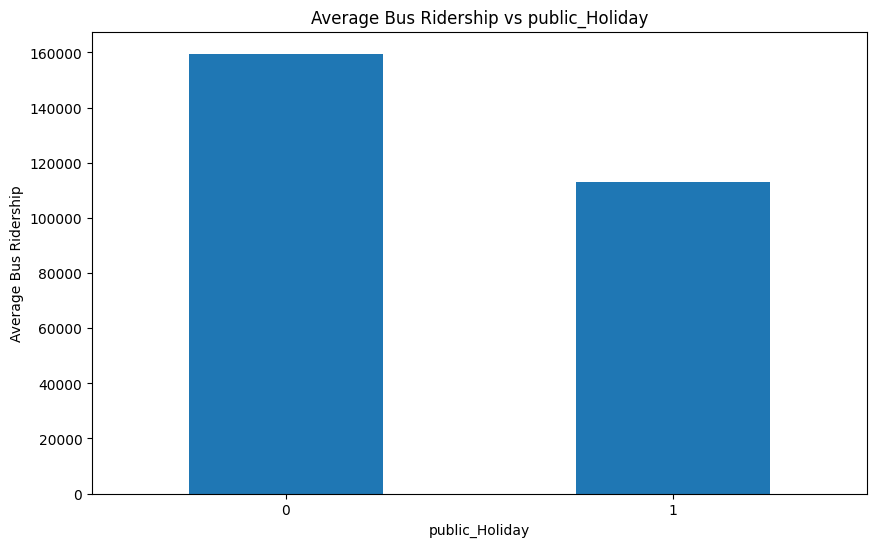

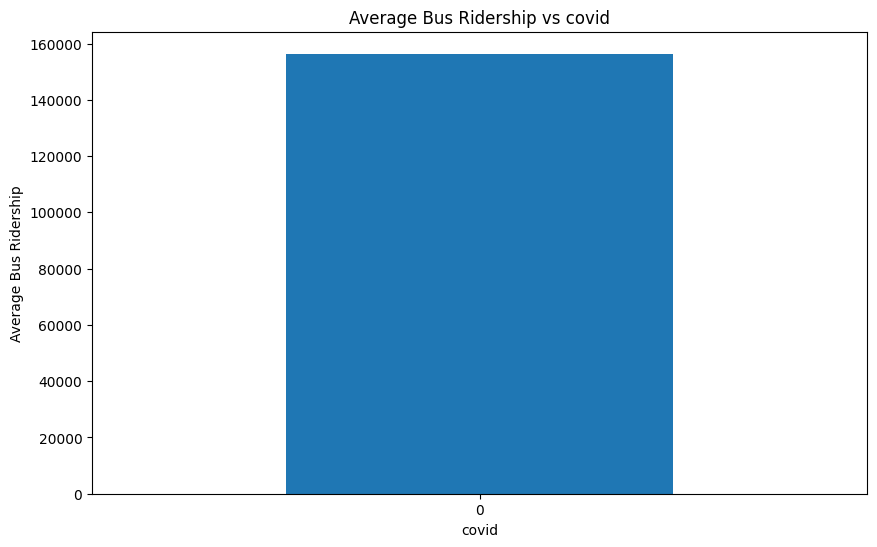

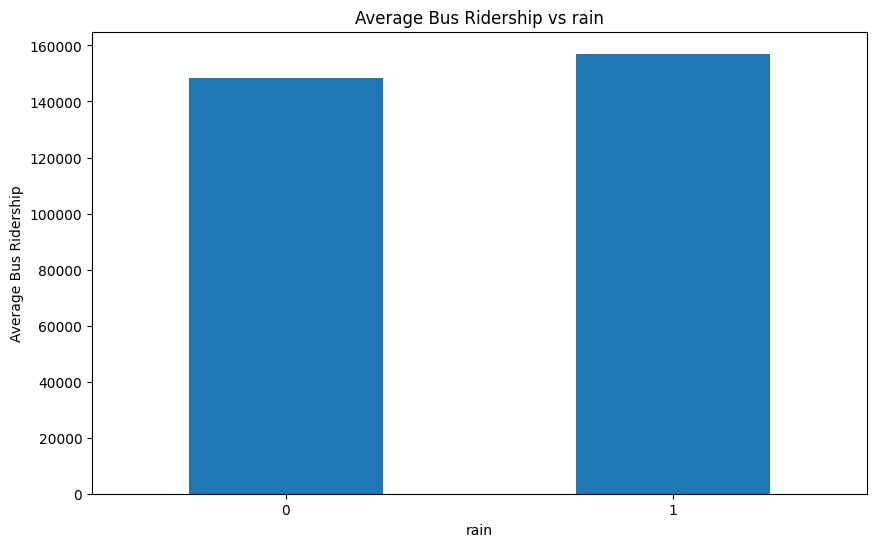

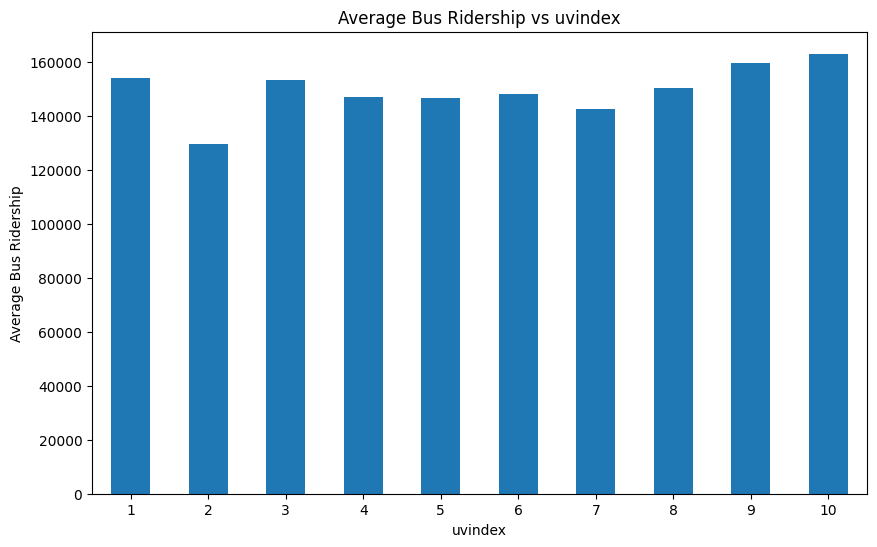

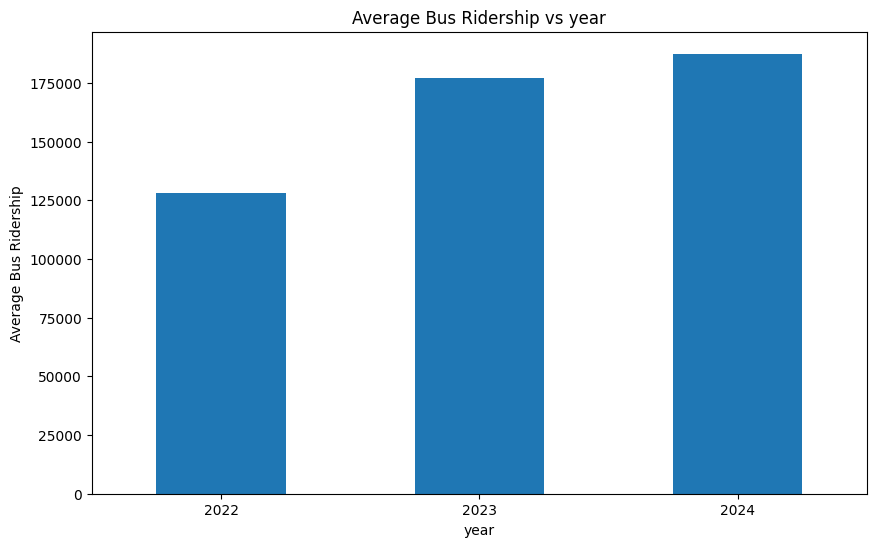

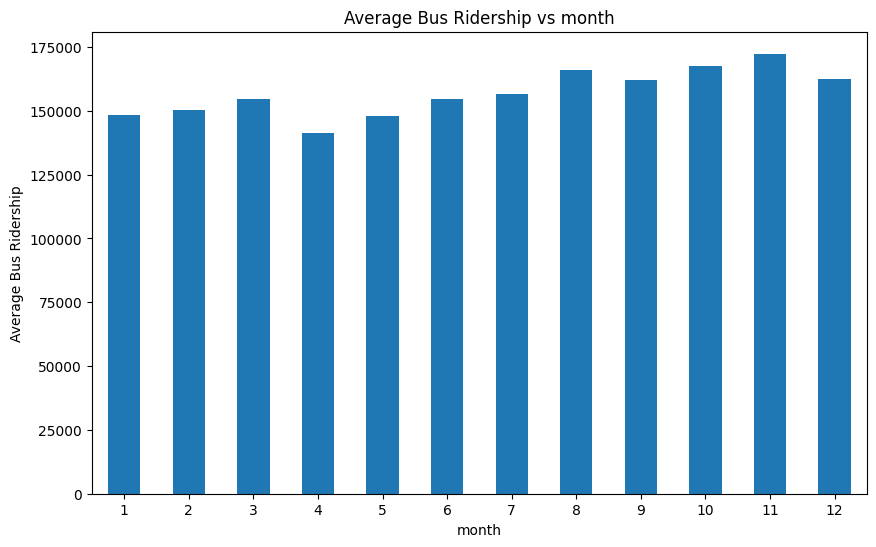

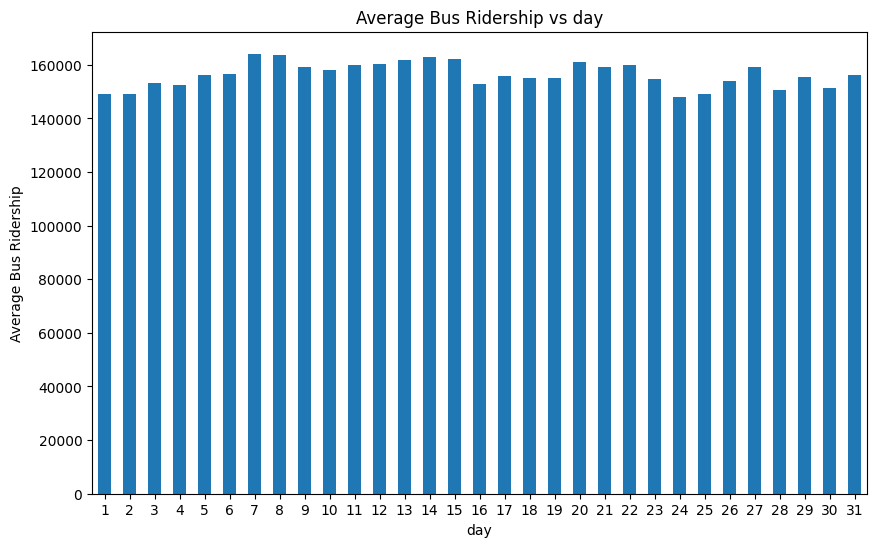

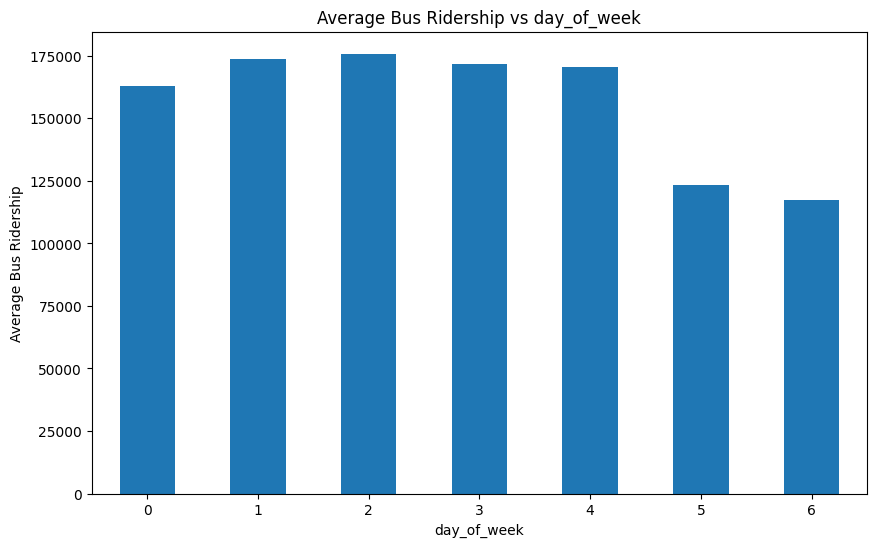

In [652]:
# Create bar graphs for categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    filtered_bus_rkl_df.groupby(feature)['bus_rkl'].mean().plot(kind='bar')
    plt.title(f'Average Bus Ridership vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Average Bus Ridership')
    plt.xticks(rotation=0)
    plt.show()

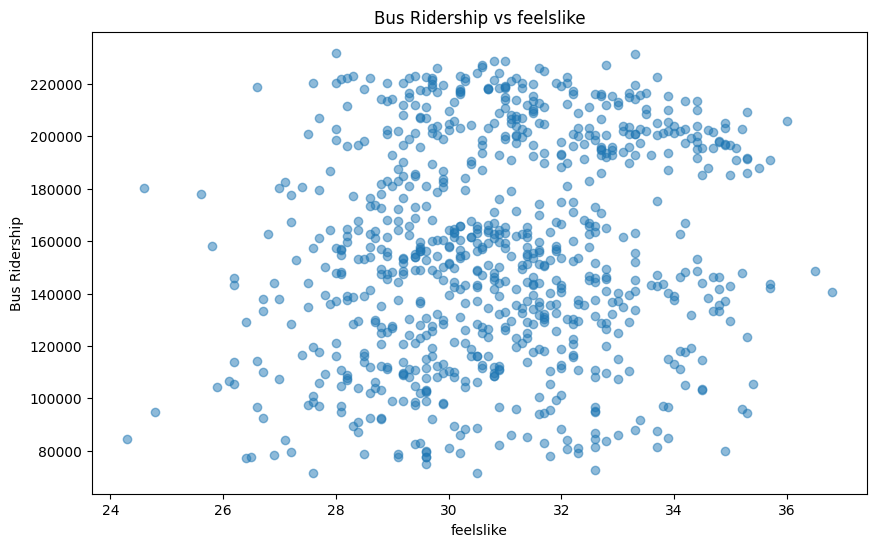

In [653]:
# Create scatter plots for continuous features
for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    plt.scatter(filtered_bus_rkl_df[feature], filtered_bus_rkl_df['bus_rkl'], alpha=0.5)
    plt.title(f'Bus Ridership vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Bus Ridership')
    plt.show()

In [654]:
#drop covid column because it does not effect the prediction
filtered_bus_rkl_df=filtered_bus_rkl_df.drop(columns='covid')
filtered_bus_rkl_df

,date,bus_rkl,public_Holiday,feelslike,uvindex,rain,day,year,month,day_of_week
1096,2022-01-01,84122.0,1,27.1,5,1,1,2022,1,5
1097,2022-01-02,77263.0,0,26.4,3,1,2,2022,1,6
1098,2022-01-03,114263.0,0,26.6,4,1,3,2022,1,0
1099,2022-01-04,113677.0,0,28.5,7,1,4,2022,1,1
1100,2022-01-05,116090.0,0,29.7,9,1,5,2022,1,2
...,...,...,...,...,...,...,...,...,...,...
1912,2024-03-27,201893.0,0,34.1,10,1,27,2024,3,2
1913,2024-03-28,114897.0,1,33.0,9,1,28,2024,3,3
1914,2024-03-29,182897.0,0,32.5,10,1,29,2024,3,4
1915,2024-03-30,118919.0,0,31.6,9,1,30,2024,3,5


In [748]:
rail_mrt_pjy_df

,date,rail_mrt_pjy,public_Holiday,covid,feelslike,uvindex,rain,day,year,month,day_of_week
0,2019-01-01,NaN,1,0,30.4,9,1,1,2019,1,1
1,2019-01-02,NaN,0,0,30.5,9,1,2,2019,1,2
2,2019-01-03,NaN,0,0,31.3,9,0,3,2019,1,3
3,2019-01-04,NaN,0,0,31.5,9,0,4,2019,1,4
4,2019-01-05,NaN,0,0,32.0,9,0,5,2019,1,5
...,...,...,...,...,...,...,...,...,...,...,...
1912,2024-03-27,149236.0,0,0,34.1,10,1,27,2024,3,2
1913,2024-03-28,79863.0,1,0,33.0,9,1,28,2024,3,3
1914,2024-03-29,132224.0,0,0,32.5,10,1,29,2024,3,4
1915,2024-03-30,80600.0,0,0,31.6,9,1,30,2024,3,5


In [749]:
rail_mrt_pjy_df.isnull().sum()

date                 0
rail_mrt_pjy      1262
public_Holiday       0
covid                0
feelslike            0
uvindex              0
rain                 0
day                  0
year                 0
month                0
day_of_week          0
dtype: int64

In [750]:
# Remove rows where bus_rkl is zero
filtered_rail_mrt_pjy_df = rail_mrt_pjy_df.dropna()

# Save the filtered data to a new CSV file (optional)
filtered_rail_mrt_pjy_df.to_csv('filtered_rail_mrt_pjy_data.csv', index=False)

# Display the filtered data
filtered_rail_mrt_pjy_df

,date,rail_mrt_pjy,public_Holiday,covid,feelslike,uvindex,rain,day,year,month,day_of_week
1262,2022-06-16,13367.0,0,0,30.6,8,1,16,2022,6,3
1263,2022-06-17,22621.0,0,0,28.0,8,1,17,2022,6,4
1264,2022-06-18,28885.0,0,0,28.8,9,1,18,2022,6,5
1265,2022-06-19,32066.0,0,0,30.8,8,1,19,2022,6,6
1266,2022-06-20,21564.0,0,0,28.5,7,1,20,2022,6,0
...,...,...,...,...,...,...,...,...,...,...,...
1912,2024-03-27,149236.0,0,0,34.1,10,1,27,2024,3,2
1913,2024-03-28,79863.0,1,0,33.0,9,1,28,2024,3,3
1914,2024-03-29,132224.0,0,0,32.5,10,1,29,2024,3,4
1915,2024-03-30,80600.0,0,0,31.6,9,1,30,2024,3,5


In [751]:
filtered_rail_mrt_pjy_df.describe()

,date,rail_mrt_pjy,public_Holiday,covid,feelslike,uvindex,rain,day,year,month,day_of_week
count,655,655.000000,655.000000,655.0,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000
mean,2023-05-09 00:00:00,67885.822901,0.067176,0.0,30.838321,8.500763,0.935878,15.914504,2022.835115,6.719084,3.009160
min,2022-06-16 00:00:00,12108.000000,0.000000,0.0,24.300000,1.000000,0.000000,1.000000,2022.000000,1.000000,0.000000
25%,2022-11-26 12:00:00,22697.000000,0.000000,0.0,29.300000,8.000000,1.000000,8.000000,2022.000000,3.000000,1.000000
50%,2023-05-09 00:00:00,64120.000000,0.000000,0.0,30.800000,9.000000,1.000000,16.000000,2023.000000,7.000000,3.000000
75%,2023-10-19 12:00:00,110979.000000,0.000000,0.0,32.250000,9.000000,1.000000,23.500000,2023.000000,10.000000,5.000000
max,2024-03-31 00:00:00,150582.000000,1.000000,0.0,36.500000,10.000000,1.000000,31.000000,2024.000000,12.000000,6.000000
std,NaN,45475.616764,0.250517,0.0,2.109926,1.617824,0.245158,8.807247,0.645133,3.585204,2.000743


In [752]:
filtered_rail_mrt_pjy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 655 entries, 1262 to 1916
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            655 non-null    datetime64[ns]
 1   rail_mrt_pjy    655 non-null    float64       
 2   public_Holiday  655 non-null    int64         
 3   covid           655 non-null    int64         
 4   feelslike       655 non-null    float64       
 5   uvindex         655 non-null    int64         
 6   rain            655 non-null    int64         
 7   day             655 non-null    int32         
 8   year            655 non-null    int32         
 9   month           655 non-null    int32         
 10  day_of_week     655 non-null    int32         
dtypes: datetime64[ns](1), float64(2), int32(4), int64(4)
memory usage: 51.2 KB


In [753]:
filtered_rail_mrt_pjy_df.shape

(655, 11)

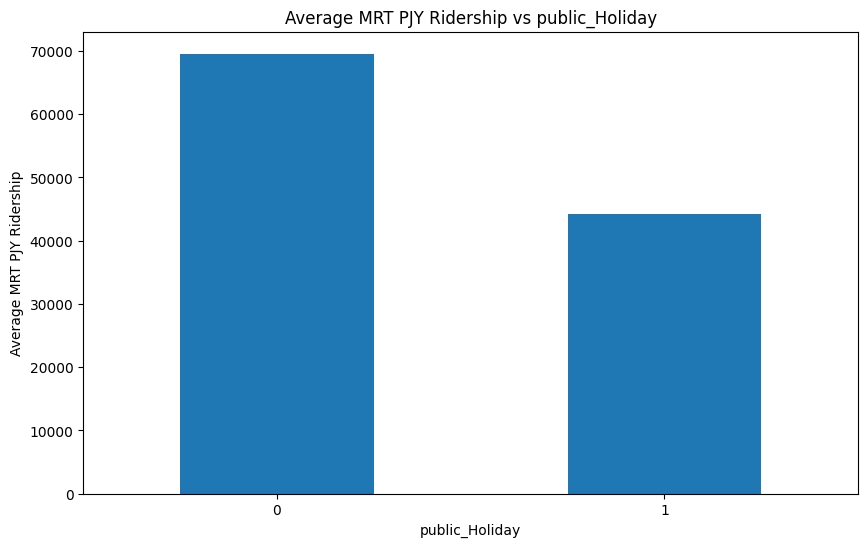

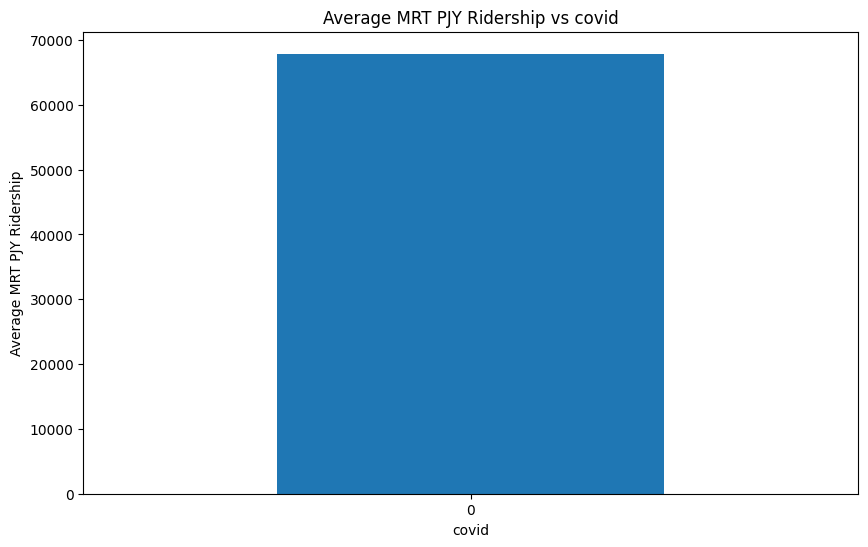

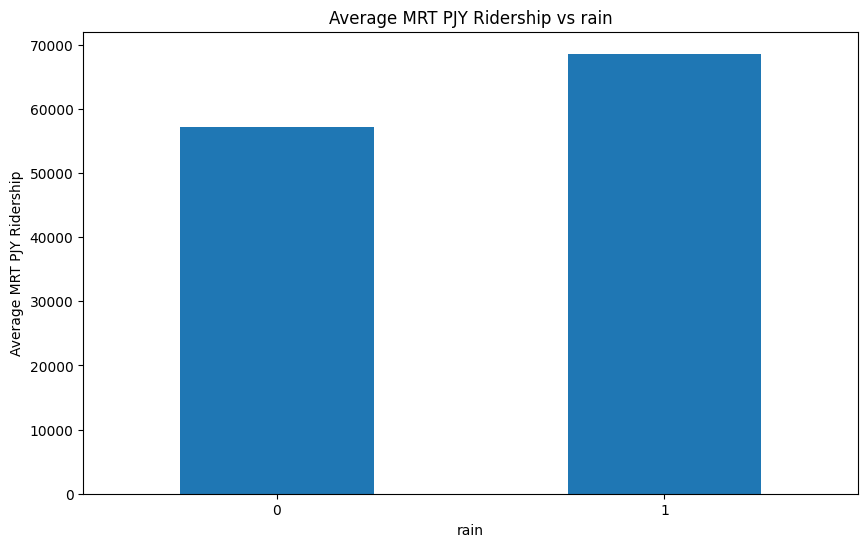

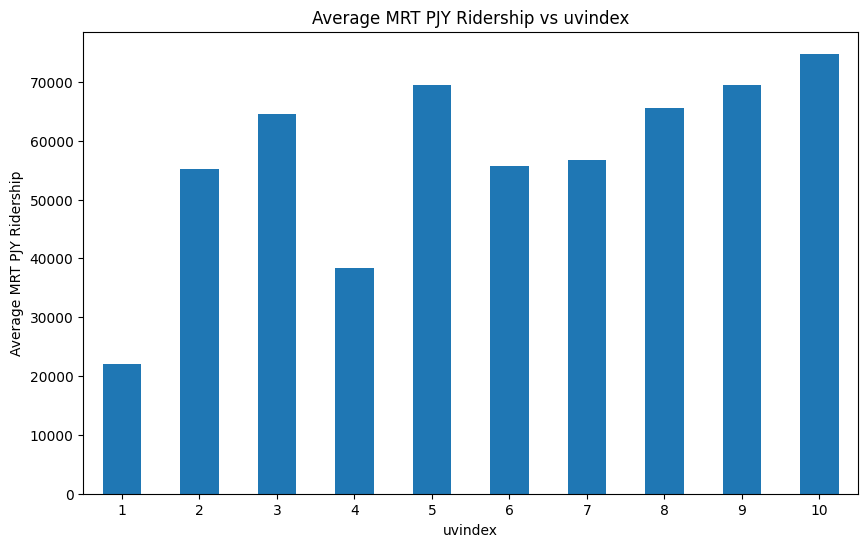

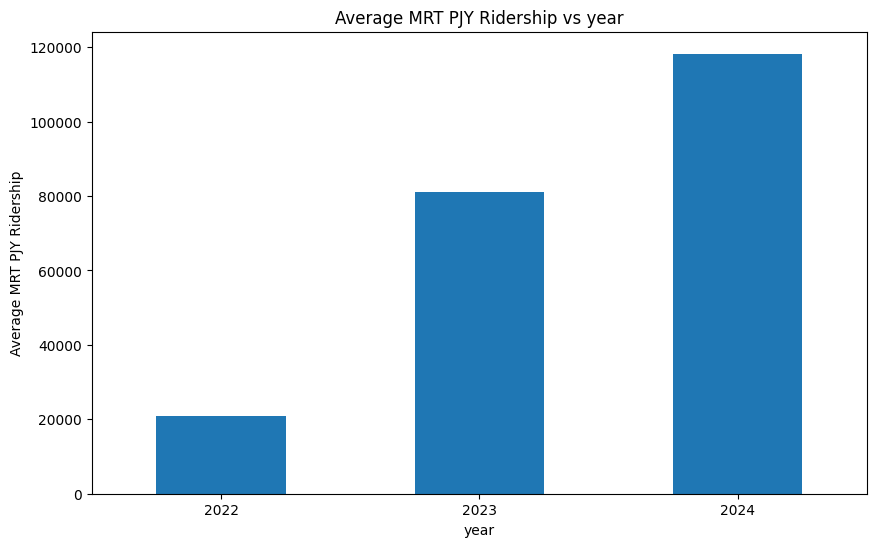

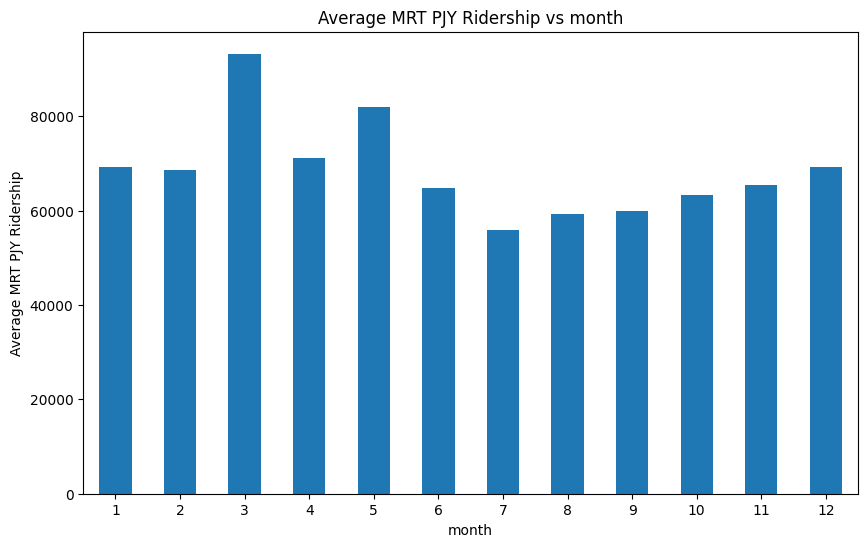

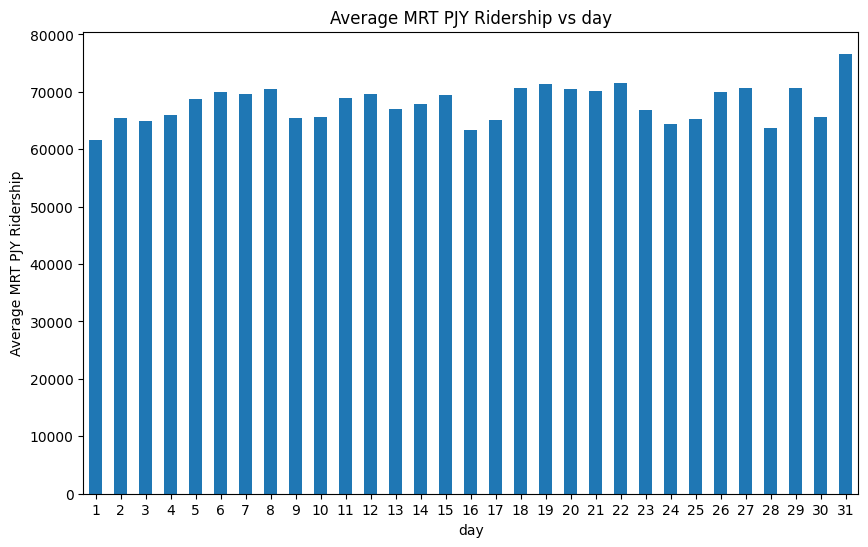

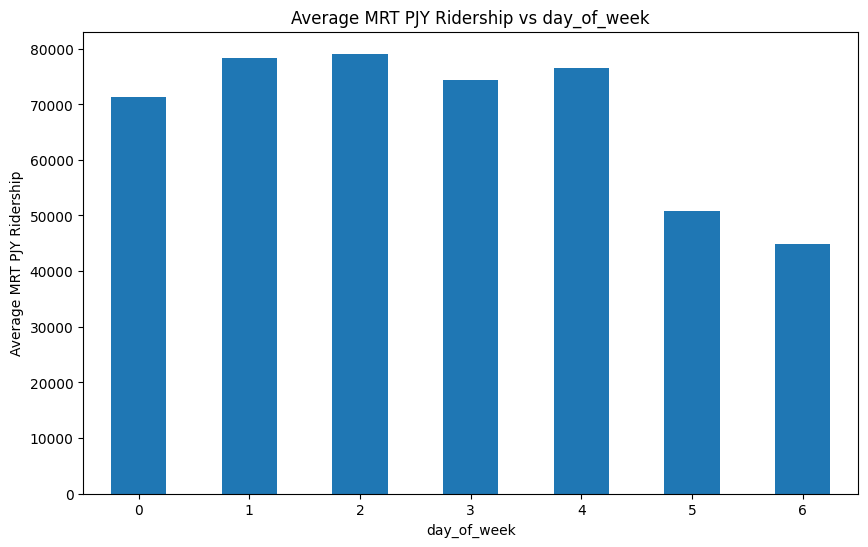

In [745]:
# Create bar graphs for categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    filtered_rail_mrt_pjy_df.groupby(feature)['rail_mrt_pjy'].mean().plot(kind='bar')
    plt.title(f'Average MRT PJY Ridership vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Average MRT PJY Ridership')
    plt.xticks(rotation=0)
    plt.show()

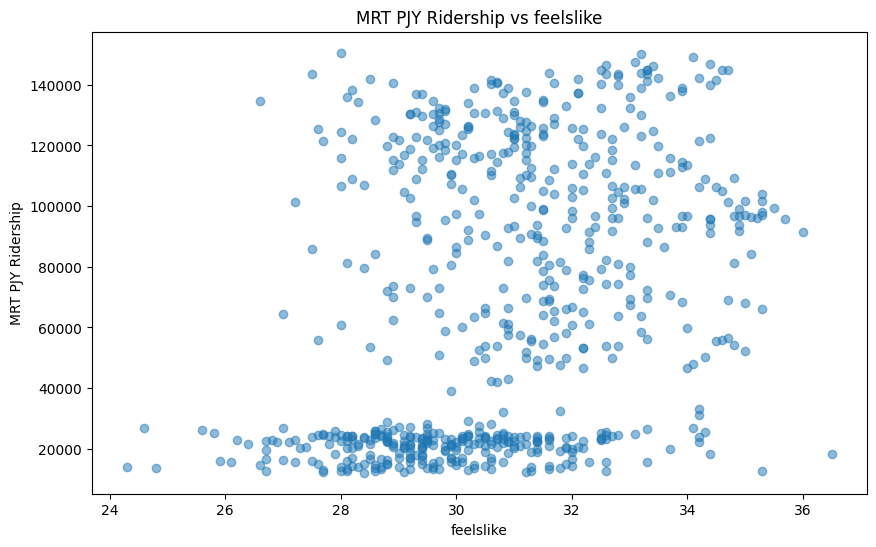

In [746]:
# Create scatter plots for continuous features
for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    plt.scatter(filtered_rail_mrt_pjy_df[feature], filtered_rail_mrt_pjy_df['rail_mrt_pjy'], alpha=0.5)
    plt.title(f'MRT PJY Ridership vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('MRT PJY Ridership')
    plt.show()

In [728]:
other_ridership_df

,date,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,public_Holiday,covid,feelslike,uvindex,rain,year,month,day,day_of_week
0,2019-01-01,113357,114173,139634,35804,1,0,30.4,9,1,2019,1,1,1
1,2019-01-02,182715,169316,274224,31859,0,0,30.5,9,1,2019,1,2,2
2,2019-01-03,187904,175304,286469,31893,0,0,31.3,9,0,2019,1,3,3
3,2019-01-04,198420,187891,304755,34121,0,0,31.5,9,0,2019,1,4,4
4,2019-01-05,120773,112660,145036,29950,0,0,32.0,9,0,2019,1,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,2024-03-27,195860,251996,278863,55175,0,0,34.1,10,1,2024,3,27,2
1913,2024-03-28,123967,156908,138478,38093,1,0,33.0,9,1,2024,3,28,3
1914,2024-03-29,182922,227034,241375,53130,0,0,32.5,10,1,2024,3,29,4
1915,2024-03-30,136787,161181,145586,46335,0,0,31.6,9,1,2024,3,30,5


In [665]:
other_ridership_df.isnull().sum()

date               0
rail_lrt_ampang    0
rail_mrt_kajang    0
rail_lrt_kj        0
rail_monorail      0
public_Holiday     0
covid              0
feelslike          0
uvindex            0
rain               0
year               0
month              0
day                0
day_of_week        0
dtype: int64

In [666]:
other_ridership_df.describe()

,date,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,public_Holiday,covid,feelslike,uvindex,rain,year,month,day,day_of_week
count,1917,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000
mean,2021-08-15 23:59:59.999999744,120332.308294,129300.104330,163606.312989,30032.085029,0.058946,0.302556,31.103182,8.016693,0.774648,2021.141888,6.308816,15.725613,3.001565
min,2019-01-01 00:00:00,6587.000000,4973.000000,7195.000000,1392.000000,0.000000,0.000000,23.800000,1.000000,0.000000,2019.000000,1.000000,1.000000,0.000000
25%,2020-04-24 00:00:00,80915.000000,74085.000000,93399.000000,16896.000000,0.000000,0.000000,29.500000,7.000000,1.000000,2020.000000,3.000000,8.000000,1.000000
50%,2021-08-16 00:00:00,117356.000000,125004.000000,142522.000000,31121.000000,0.000000,0.000000,31.000000,8.000000,1.000000,2021.000000,6.000000,16.000000,3.000000
75%,2022-12-08 00:00:00,160504.000000,194012.000000,236468.000000,41187.000000,0.000000,1.000000,32.600000,9.000000,1.000000,2022.000000,9.000000,23.000000,5.000000
max,2024-03-31 00:00:00,258313.000000,265735.000000,352328.000000,79585.000000,1.000000,1.000000,38.800000,10.000000,1.000000,2024.000000,12.000000,31.000000,6.000000
std,NaN,55462.925168,66938.710032,92358.525093,16010.931569,0.235586,0.459485,2.162166,1.495202,0.417923,1.520803,3.505973,8.800553,1.999869


In [667]:
other_ridership_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             1917 non-null   datetime64[ns]
 1   rail_lrt_ampang  1917 non-null   int64         
 2   rail_mrt_kajang  1917 non-null   int64         
 3   rail_lrt_kj      1917 non-null   int64         
 4   rail_monorail    1917 non-null   int64         
 5   public_Holiday   1917 non-null   int64         
 6   covid            1917 non-null   int64         
 7   feelslike        1917 non-null   float64       
 8   uvindex          1917 non-null   int64         
 9   rain             1917 non-null   int64         
 10  year             1917 non-null   int32         
 11  month            1917 non-null   int32         
 12  day              1917 non-null   int32         
 13  day_of_week      1917 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(

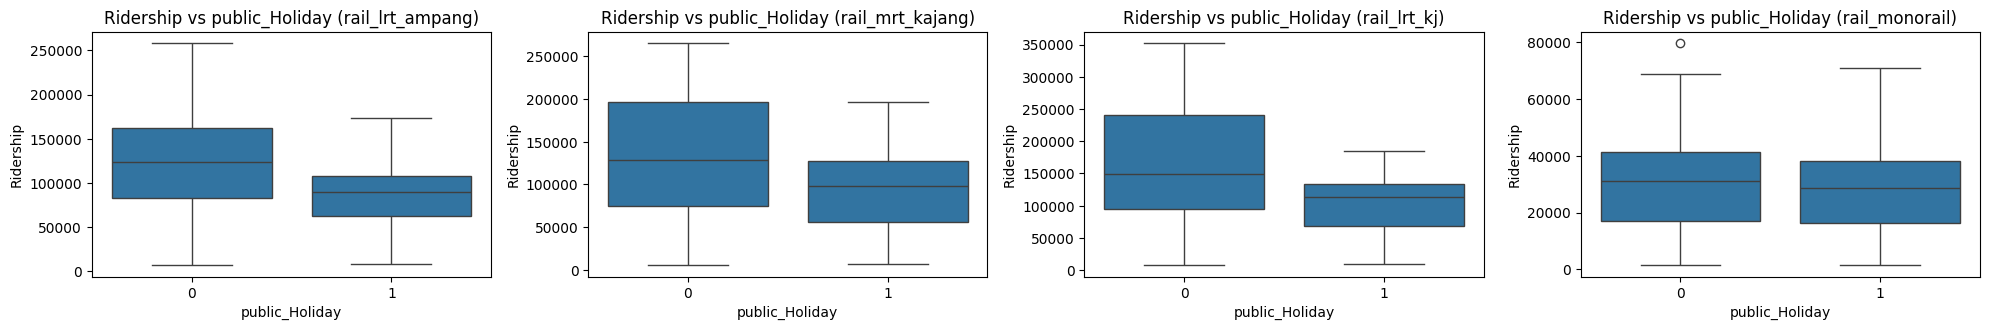

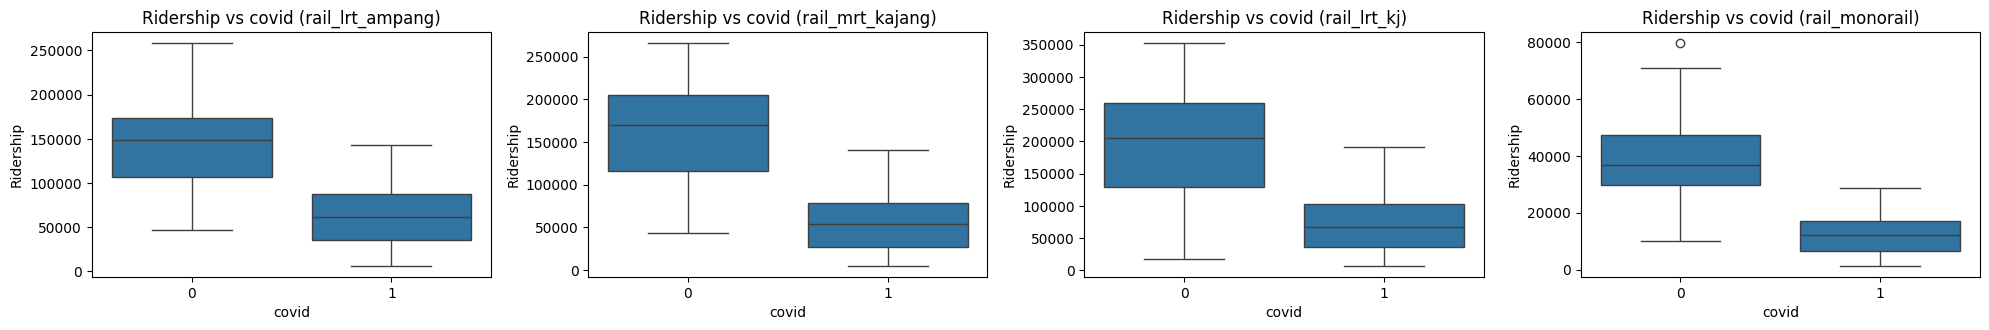

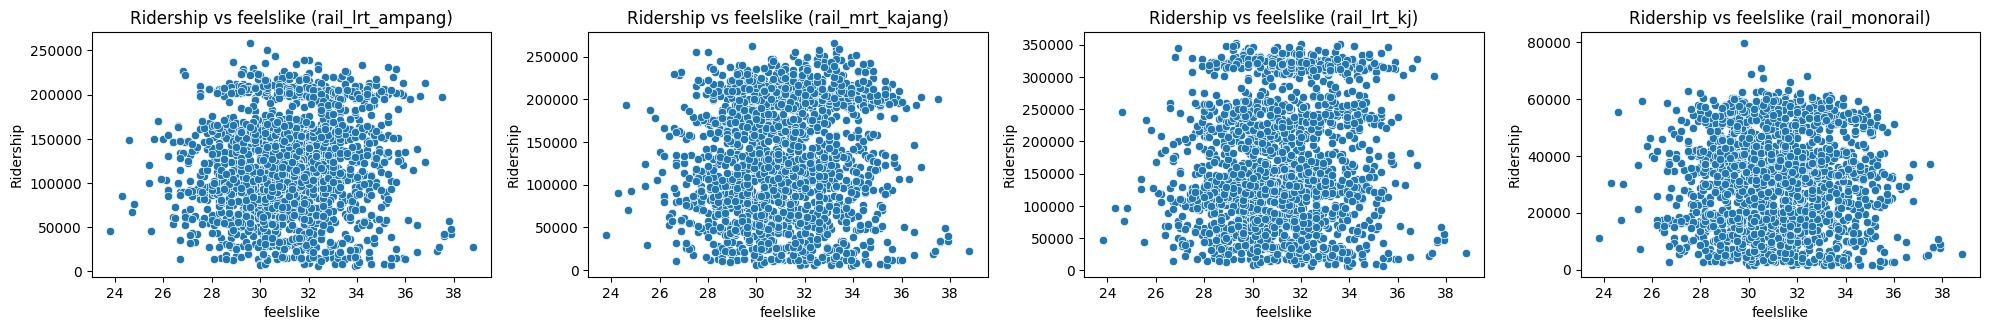

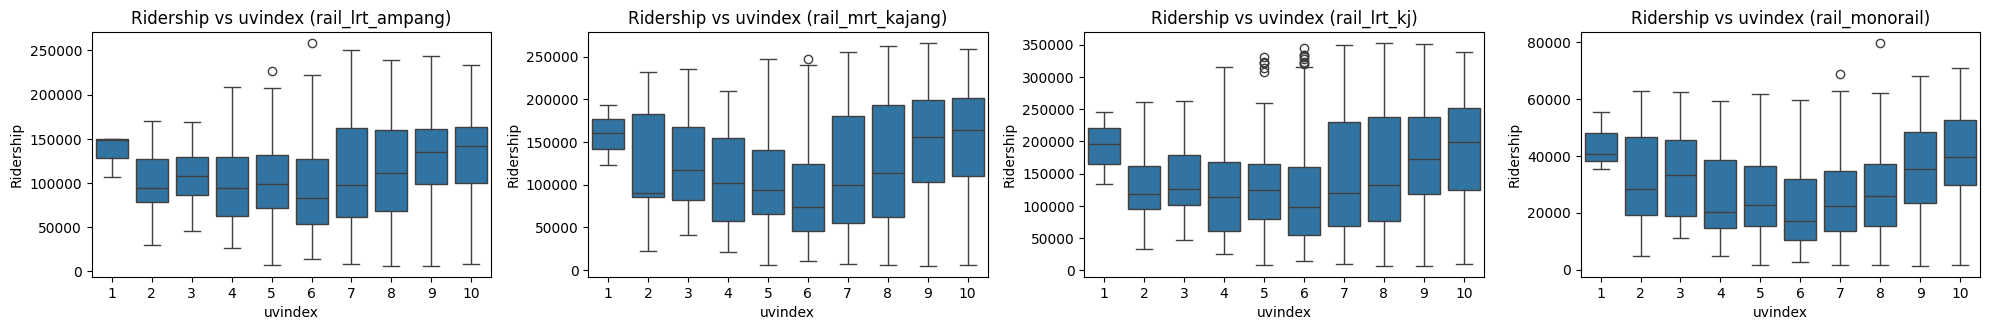

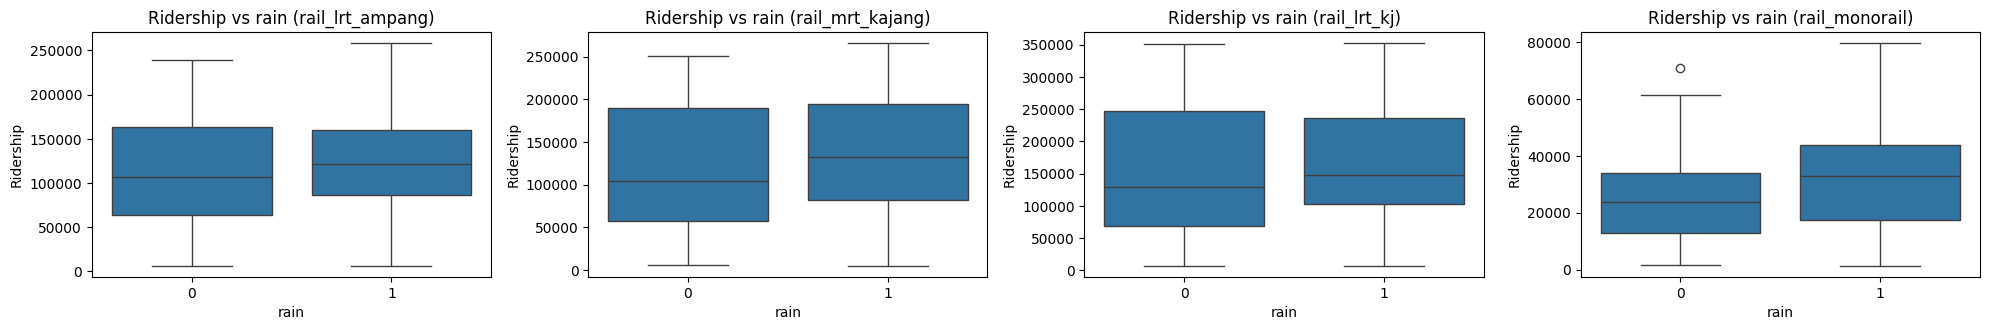

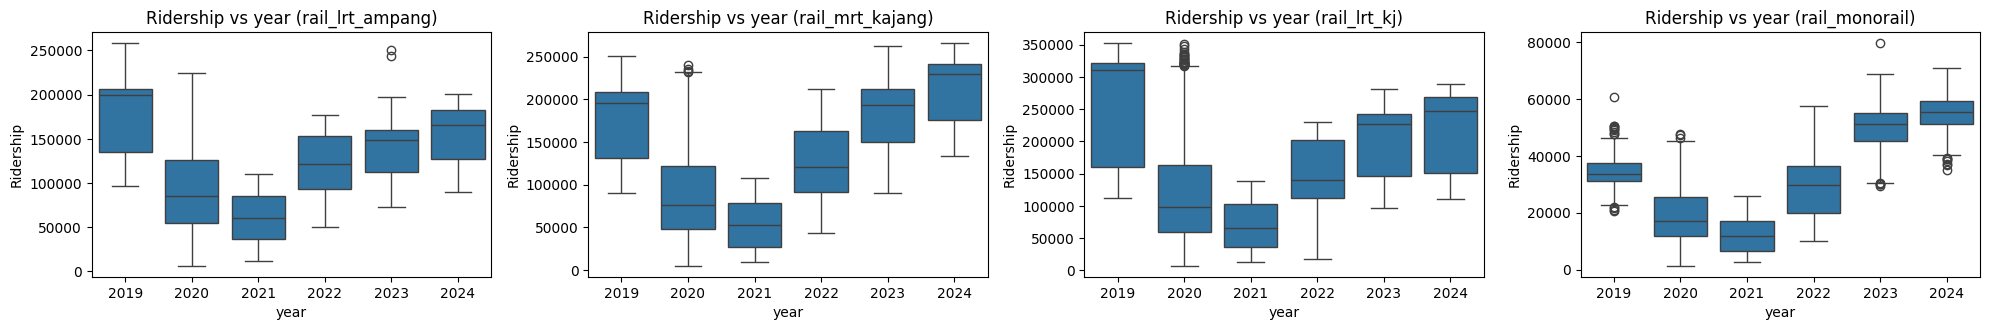

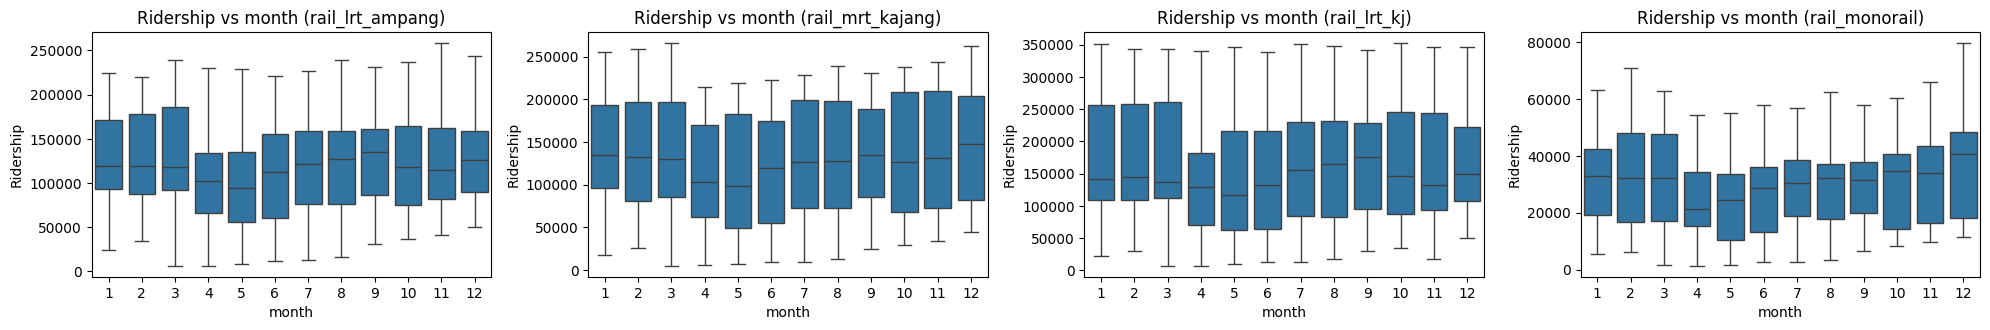

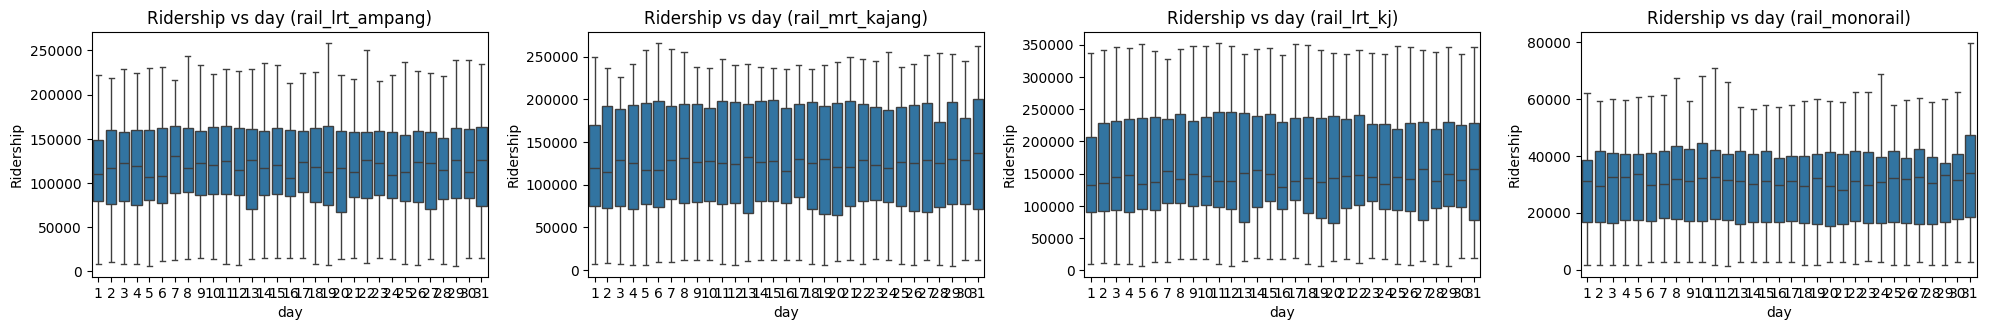

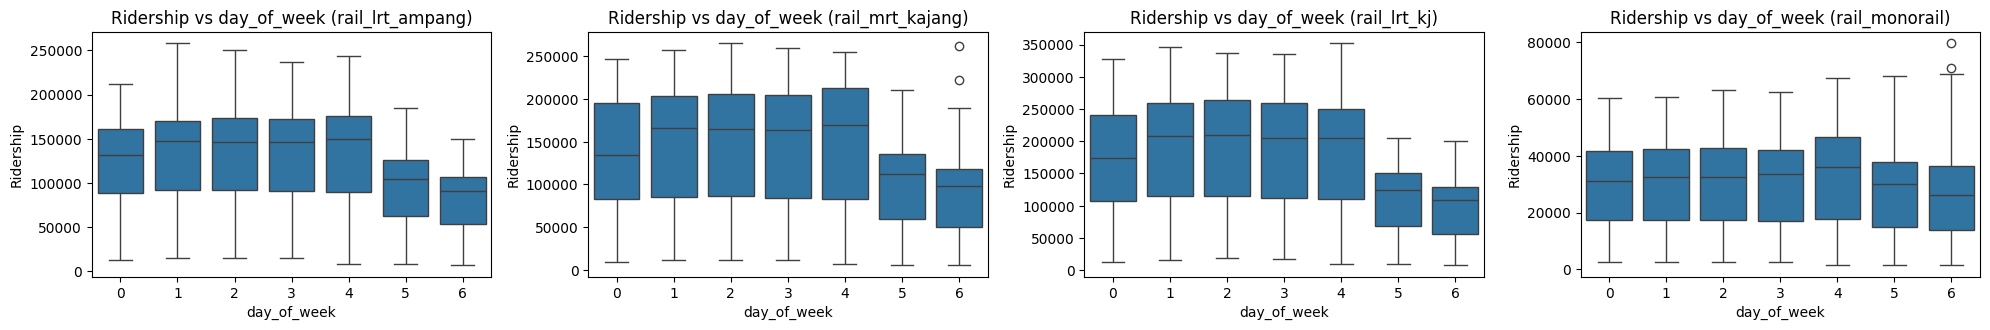

In [668]:
# Define the ridership columns and features
ridership_columns = ['rail_lrt_ampang', 'rail_mrt_kajang', 'rail_lrt_kj', 'rail_monorail']
features = ['public_Holiday', 'covid', 'feelslike', 'uvindex', 'rain', 'year', 'month', 'day', 'day_of_week']

# Determine the number of rows needed for the plots
num_rows = (len(features) + 4) // 5  # Ceiling division to ensure we have enough rows

# Loop over each feature and plot ridership against it
for i, feature in enumerate(features):
    plt.figure(figsize=(20, 6))
    for j, column in enumerate(ridership_columns):
        plt.subplot(num_rows, len(ridership_columns), j + 1)
        if feature in ['public_Holiday', 'covid', 'uvindex', 'rain', 'year', 'month', 'day', 'day_of_week']:  # For categorical features, use boxplot
            sns.boxplot(x=feature, y=column, data=other_ridership_df)
        else:  # For continuous features, use scatterplot
            sns.scatterplot(x=feature, y=column, data=other_ridership_df)
        plt.title(f'Ridership vs {feature} ({column})')
        plt.xlabel(feature)
        plt.ylabel('Ridership')
    plt.tight_layout()
    plt.show()

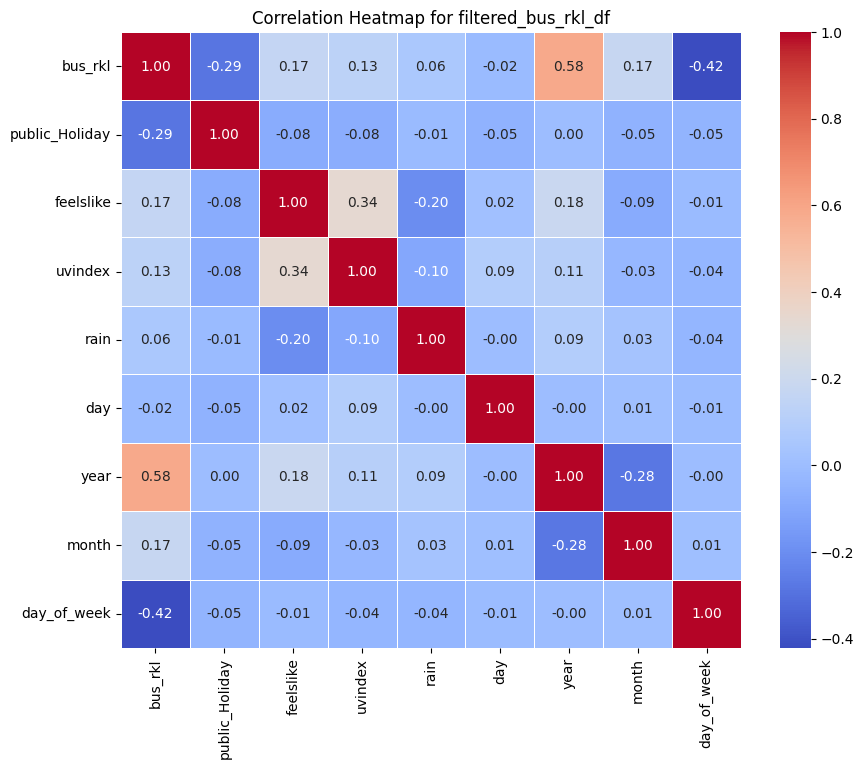

In [669]:
# If there are non-numeric columns, you might need to select only numeric columns for correlation analysis
numeric_columns = filtered_bus_rkl_df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for filtered_bus_rkl_df')
plt.show()

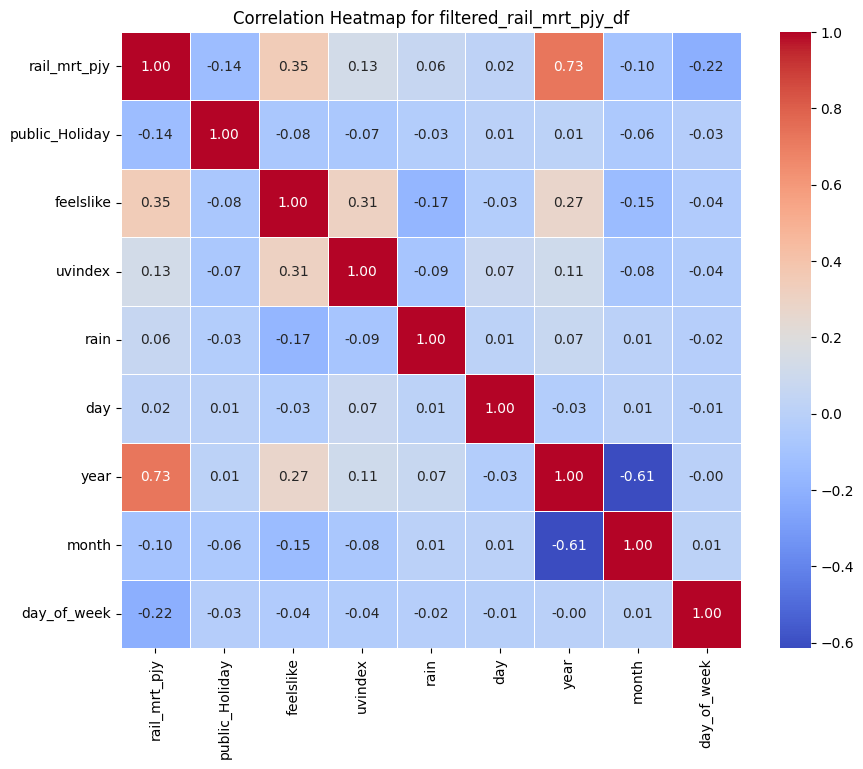

In [670]:
# If there are non-numeric columns, you might need to select only numeric columns for correlation analysis
numeric_columns = filtered_rail_mrt_pjy_df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for filtered_rail_mrt_pjy_df')
plt.show()

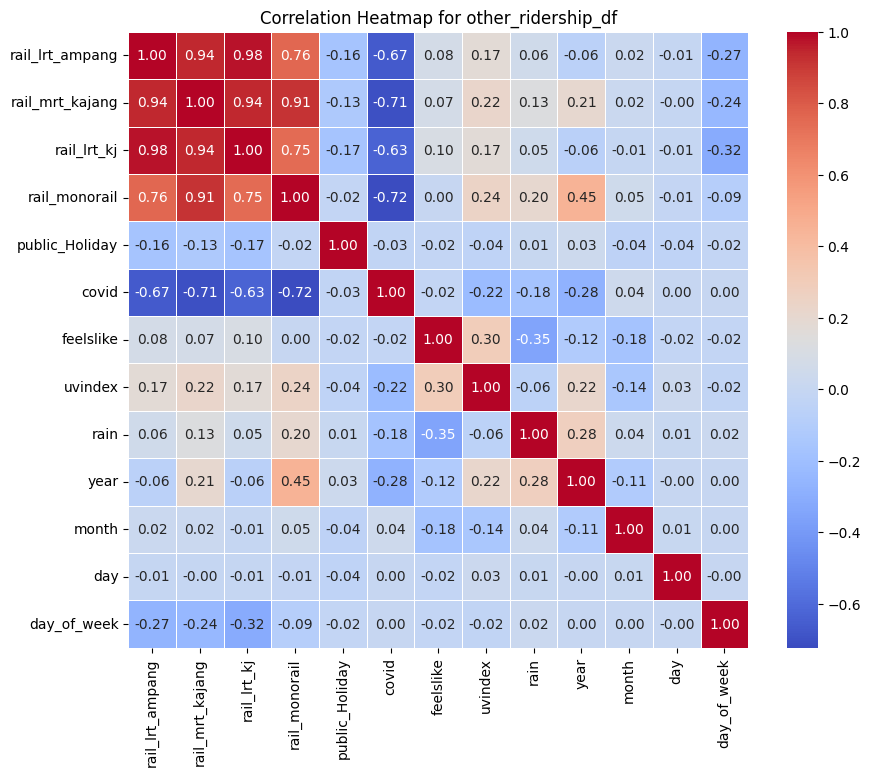

In [671]:
# If there are non-numeric columns, you might need to select only numeric columns for correlation analysis
numeric_columns = other_ridership_df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for other_ridership_df')
plt.show()

# Develop SARIMAX model for BUS_RKL

In [672]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from joblib import Parallel, delayed
import multiprocessing

In [673]:
# Convert 'date' column to datetime and set as index
filtered_bus_rkl_df['date'] = pd.to_datetime(filtered_bus_rkl_df['date'])
filtered_bus_rkl_df.set_index('date', inplace=True)

In [674]:
# Feature Engineering
def add_lagged_features(df, target, lags):
    for lag in lags:
        df[f'{target}_lag_{lag}'] = df[target].shift(lag)
    return df

In [675]:
# Add lagged features
target = 'bus_rkl'
lags = [1, 2, 3, 7, 14]
filtered_bus_rkl_df = add_lagged_features(filtered_bus_rkl_df, target, lags)
filtered_bus_rkl_df.dropna(inplace=True)

In [676]:
# Train-test split
train_size_bus = int(len(filtered_bus_rkl_df) * 0.8)
train_bus, test_bus = filtered_bus_rkl_df.iloc[:train_size_bus], filtered_bus_rkl_df.iloc[train_size_bus:]

In [677]:
# Define features and target
features = ['public_Holiday', 'feelslike', 'uvindex', 'day', 'year', 'month', 'day_of_week', 'rain'] + [f'{target}_lag_{lag}' for lag in lags]

In [678]:
# Function to fit and evaluate a single set of hyperparameters
def evaluate_model(order, seasonal_order, train, features, target, tscv):
    mse_scores = []
    for train_index, val_index in tscv.split(train):
        train_fold, val_fold = train.iloc[train_index], train.iloc[val_index]
        exog_train = train_fold[features]
        exog_val = val_fold[features]
        try:
            model = SARIMAX(endog=train_fold[target], exog=exog_train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
            model_fit = model.fit(disp=False)
            predictions = model_fit.forecast(steps=len(val_fold), exog=exog_val)
            mse_scores.append(mean_squared_error(val_fold[target], predictions))
        except:
            return float('inf'), (order, seasonal_order)
    avg_mse = np.mean(mse_scores) if mse_scores else float('inf')
    return avg_mse, (order, seasonal_order)


In [679]:
# Parallel cross-validation and hyperparameter tuning
def sarimax_cv_parallel(train, features, order_values, seasonal_order_values):
    tscv = TimeSeriesSplit(n_splits=3)
    num_cores = multiprocessing.cpu_count()
    results = Parallel(n_jobs=num_cores)(
        delayed(evaluate_model)(order, seasonal_order, train, features, target, tscv)
        for order in order_values
        for seasonal_order in seasonal_order_values
    )
    best_score, best_params = min(results, key=lambda x: x[0])
    return best_params

In [680]:
# Define a larger range of hyperparameters
order_values = [(p, d, q) for p in range(4) for d in range(2) for q in range(4)]
seasonal_order_values = [(P, D, Q, 12) for P in range(2) for D in range(2) for Q in range(2)]

In [681]:
# Perform cross-validation and hyperparameter tuning
best_params = sarimax_cv_parallel(train_bus, features, order_values, seasonal_order_values)
print("Best SARIMAX Order:", best_params)

Best SARIMAX Order: ((3, 0, 3), (0, 0, 0, 12))


In [682]:
# Build the final SARIMAX model with the best parameters
model_bus_rkl = SARIMAX(endog=train_bus[target], exog=train_bus[features], order=best_params[0], seasonal_order=best_params[1], enforce_stationarity=False, enforce_invertibility=False)
model_bus_rkl_fit = model_bus_rkl.fit()

In [683]:
# Automated feature filling for future dates
def create_future_features(last_known_features, future_dates):
    future_features = pd.DataFrame(index=future_dates)
    for feature in last_known_features:
        if feature in ['day', 'year', 'month', 'day_of_week']:
            if feature == 'day':
                future_features[feature] = future_dates.day
            elif feature == 'year':
                future_features[feature] = future_dates.year
            elif feature == 'month':
                future_features[feature] = future_dates.month
            elif feature == 'day_of_week':
                future_features[feature] = future_dates.dayofweek
        else:
            future_features[feature] = last_known_features[feature]
    return future_features

In [684]:
# Generate future dates and features
future_dates = pd.date_range(start=test_bus.index[-1] + pd.Timedelta(days=1), periods=180, freq='D')
last_known_features = test_bus[features].iloc[-1].to_dict()
future_features = create_future_features(last_known_features, future_dates)

In [685]:
# Ensure no NaNs or infinite values in future_features
future_features = future_features.fillna(method='ffill').fillna(method='bfill')

In [686]:
# Combine the train, test, and future features
combined_exog = pd.concat([train_bus[features], test_bus[features], future_features], axis=0)

In [687]:
# Make predictions for the test set
test_predictions_bus = model_bus_rkl_fit.predict(start=len(train_bus), end=len(train_bus)+len(test_bus)-1, exog=combined_exog.iloc[len(train_bus):len(train_bus)+len(test_bus)])

In [688]:
# Calculate RMSE for the test set
test_rmse_bus = np.sqrt(mean_squared_error(test_bus[target], test_predictions_bus))
print("Test RMSE:", test_rmse_bus)


Test RMSE: 17049.05899036323


In [689]:
# Forecast future values
future_predictions_bus = model_bus_rkl_fit.predict(start=len(train_bus)+len(test_bus), end=len(train_bus)+len(test_bus)+180-1, exog=combined_exog.iloc[len(train_bus):])


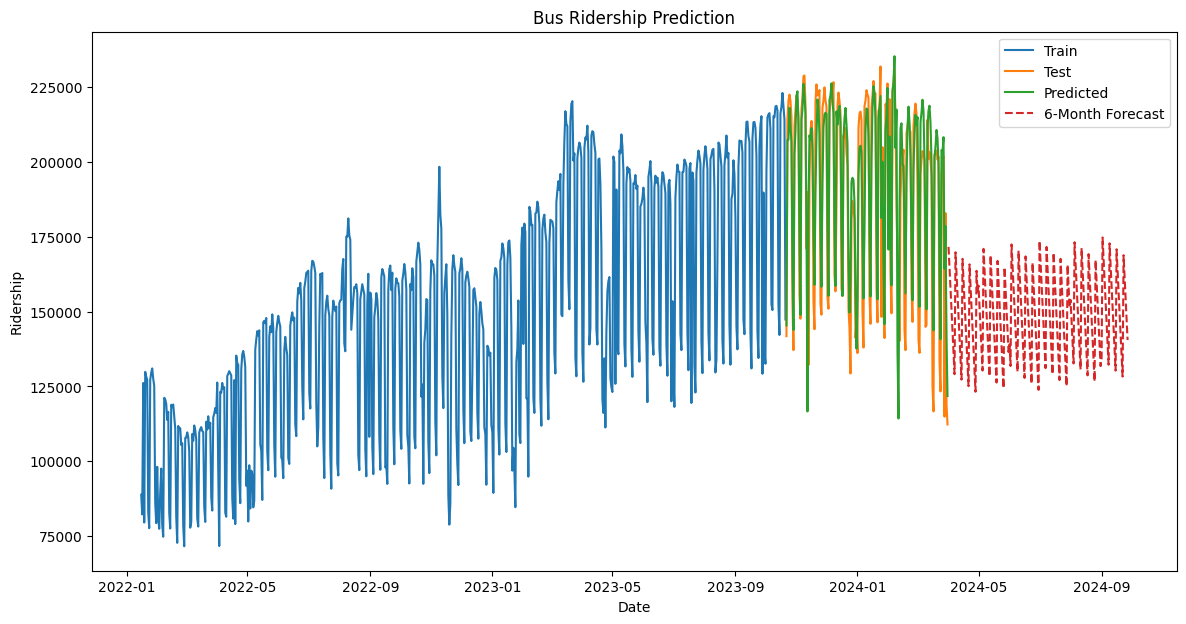

In [690]:
# Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(train_bus.index, train_bus[target], label='Train')
plt.plot(test_bus.index, test_bus[target], label='Test')
plt.plot(test_bus.index, test_predictions_bus, label='Predicted')
plt.plot(future_features.index, future_predictions_bus, label='6-Month Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Ridership')
plt.title('Bus Ridership Prediction')
plt.legend()
plt.show()

In [691]:
residuals = test_bus[target] - test_predictions_bus

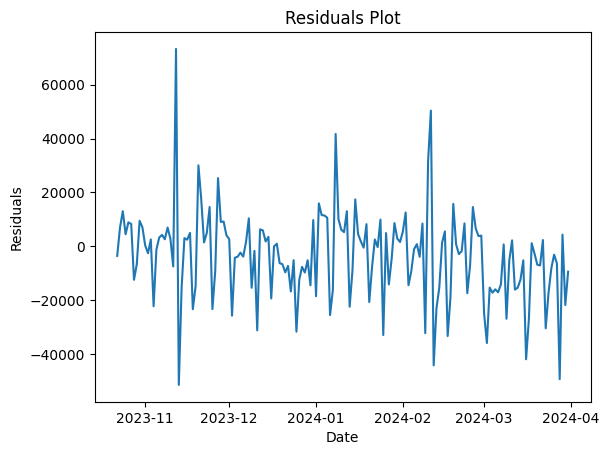

In [692]:
plt.plot(test_bus.index, residuals)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


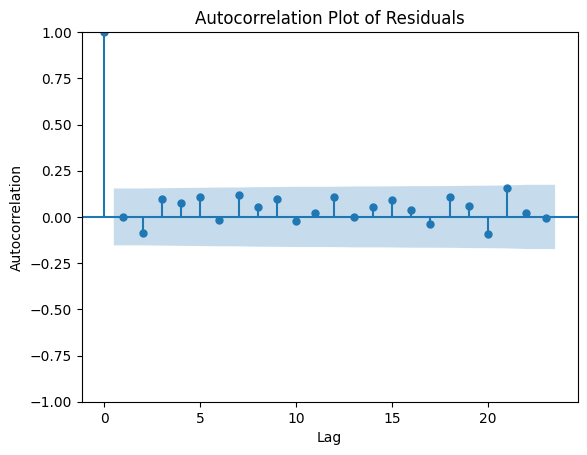

In [693]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residuals)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot of Residuals')
plt.show()

# Develop SARIMAX model for RAIL_MRT_PJY

In [698]:
# Convert 'date' column to datetime and set as index
other_ridership_df['date'] = pd.to_datetime(other_ridership_df['date'])
other_ridership_df.set_index('date', inplace=True)

In [699]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from joblib import Parallel, delayed
import multiprocessing

In [709]:
# Feature Engineering function
def add_lagged_features(df, target, lags):
    lagged_features = []
    for lag in lags:
        if lag == 0:
            continue
        lagged_features.append(f'{target}_lag_{lag}')
        df[f'{target}_lag_{lag}'] = df[target].shift(lag)
    return df, lagged_features

In [701]:
# Train-test split function
def train_test_split(df):
    train_size = int(len(df) * 0.8)
    train, test = df.iloc[:train_size], df.iloc[train_size:]
    return train, test

In [716]:
# Define a larger range of hyperparameters for SARIMAX
order_values = [(p, d, q) for p in range(2) for d in range(2) for q in range(2)]
seasonal_order_values = [(P, D, Q, 12) for P in range(2) for D in range(2) for Q in range(2)]

In [703]:
# Function to fit and evaluate a single set of hyperparameters
def evaluate_model(order, seasonal_order, train, features, target, tscv):
    mse_scores = []
    for train_index, val_index in tscv.split(train):
        train_fold, val_fold = train.iloc[train_index], train.iloc[val_index]
        exog_train = train_fold[features]
        exog_val = val_fold[features]
        try:
            model = SARIMAX(endog=train_fold[target], exog=exog_train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
            model_fit = model.fit(disp=False)
            predictions = model_fit.forecast(steps=len(val_fold), exog=exog_val)
            mse_scores.append(mean_squared_error(val_fold[target], predictions))
        except:
            return float('inf'), (order, seasonal_order)
    avg_mse = np.mean(mse_scores) if mse_scores else float('inf')
    return avg_mse, (order, seasonal_order)

In [704]:
# Parallel cross-validation and hyperparameter tuning function
def sarimax_cv_parallel(train, features, order_values, seasonal_order_values):
    tscv = TimeSeriesSplit(n_splits=3)
    num_cores = multiprocessing.cpu_count()
    results = Parallel(n_jobs=num_cores)(
        delayed(evaluate_model)(order, seasonal_order, train, features, target, tscv)
        for order in order_values
        for seasonal_order in seasonal_order_values
    )
    best_score, best_params = min(results, key=lambda x: x[0])
    return best_params

In [705]:
# Automated feature filling for future dates
def create_future_features(last_known_features, future_dates):
    future_features = pd.DataFrame(index=future_dates)
    for feature in last_known_features:
        if feature in ['day', 'year', 'month', 'day_of_week']:
            if feature == 'day':
                future_features[feature] = future_dates.day
            elif feature == 'year':
                future_features[feature] = future_dates.year
            elif feature == 'month':
                future_features[feature] = future_dates.month
            elif feature == 'day_of_week':
                future_features[feature] = future_dates.dayofweek
        else:
            future_features[feature] = last_known_features[feature]
    return future_features

In [729]:
other_ridership_df

,date,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,public_Holiday,covid,feelslike,uvindex,rain,year,month,day,day_of_week
0,2019-01-01,113357,114173,139634,35804,1,0,30.4,9,1,2019,1,1,1
1,2019-01-02,182715,169316,274224,31859,0,0,30.5,9,1,2019,1,2,2
2,2019-01-03,187904,175304,286469,31893,0,0,31.3,9,0,2019,1,3,3
3,2019-01-04,198420,187891,304755,34121,0,0,31.5,9,0,2019,1,4,4
4,2019-01-05,120773,112660,145036,29950,0,0,32.0,9,0,2019,1,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,2024-03-27,195860,251996,278863,55175,0,0,34.1,10,1,2024,3,27,2
1913,2024-03-28,123967,156908,138478,38093,1,0,33.0,9,1,2024,3,28,3
1914,2024-03-29,182922,227034,241375,53130,0,0,32.5,10,1,2024,3,29,4
1915,2024-03-30,136787,161181,145586,46335,0,0,31.6,9,1,2024,3,30,5


In [731]:
features = ['public_Holiday', 'covid', 'feelslike', 'uvindex', 'rain', 'year', 'month', 'day', 'day_of_week']

In [732]:
# Splitting the DataFrame into four separate DataFrames based on the ridership targets
rail_lrt_ampang_df = other_ridership_df[['date', 'rail_lrt_ampang'] + features]
rail_mrt_kajang_df = other_ridership_df[['date', 'rail_mrt_kajang'] + features]
rail_lrt_kj_df = other_ridership_df[['date', 'rail_lrt_kj'] + features]
rail_monorail_df = other_ridership_df[['date', 'rail_monorail'] + features]

In [734]:
print(rail_lrt_ampang_df)
print(rail_mrt_kajang_df)
print(rail_lrt_kj_df)
print(rail_monorail_df)

           date  rail_lrt_ampang  public_Holiday  covid  feelslike  uvindex  \
0    2019-01-01           113357               1      0       30.4        9   
1    2019-01-02           182715               0      0       30.5        9   
2    2019-01-03           187904               0      0       31.3        9   
3    2019-01-04           198420               0      0       31.5        9   
4    2019-01-05           120773               0      0       32.0        9   
...         ...              ...             ...    ...        ...      ...   
1912 2024-03-27           195860               0      0       34.1       10   
1913 2024-03-28           123967               1      0       33.0        9   
1914 2024-03-29           182922               0      0       32.5       10   
1915 2024-03-30           136787               0      0       31.6        9   
1916 2024-03-31           118616               0      0       30.9        8   

      rain  year  month  day  day_of_week  
0      

Best SARIMAX Order for rail_mrt_pjy: ((0, 1, 1), (0, 0, 1, 12))
Test RMSE for rail_mrt_pjy: 46348.52422569209


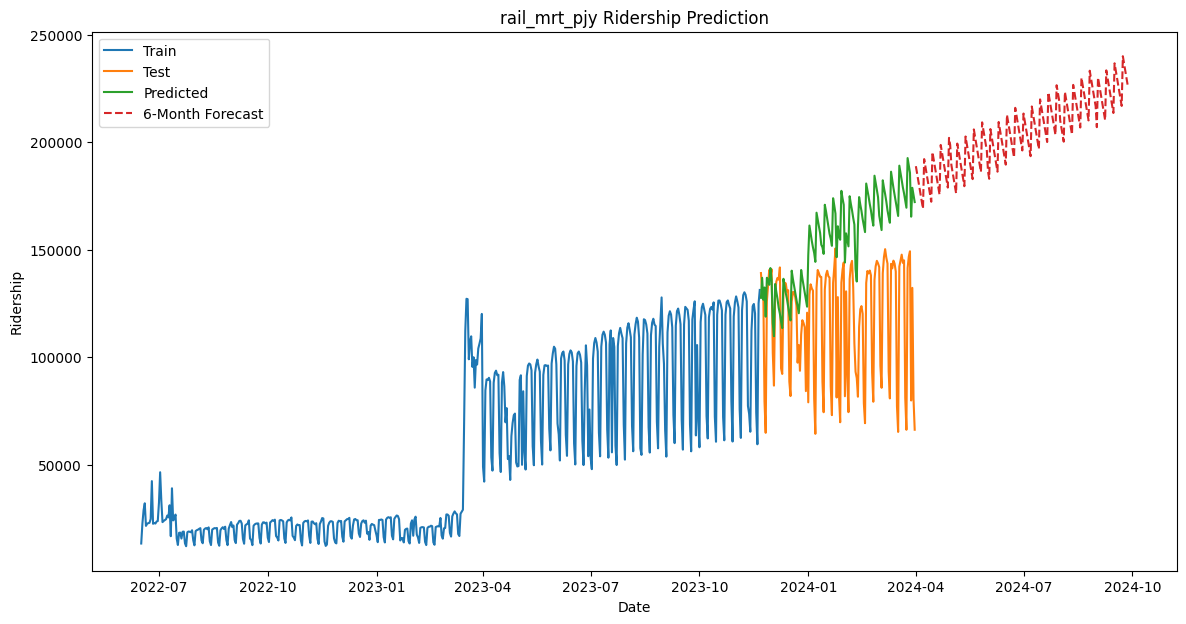

Best SARIMAX Order for rail_lrt_ampang: ((0, 0, 1), (1, 0, 1, 12))
Test RMSE for rail_lrt_ampang: 23257.91249266172


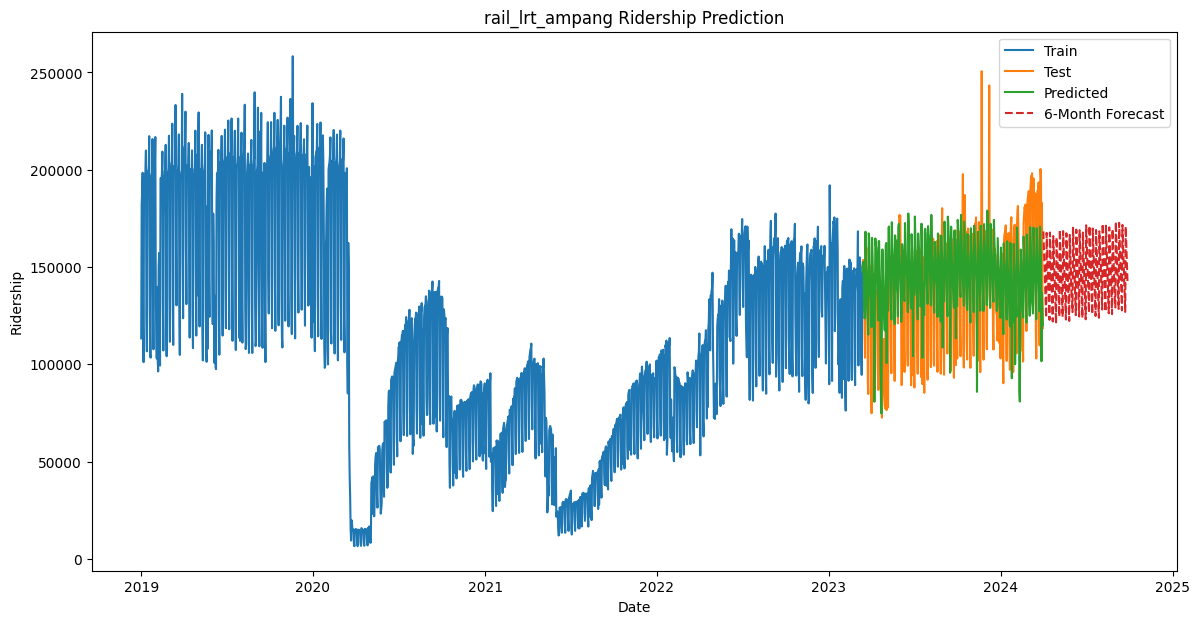

Best SARIMAX Order for rail_mrt_kajang: ((0, 0, 1), (1, 0, 1, 12))
Test RMSE for rail_mrt_kajang: 53423.207304736046


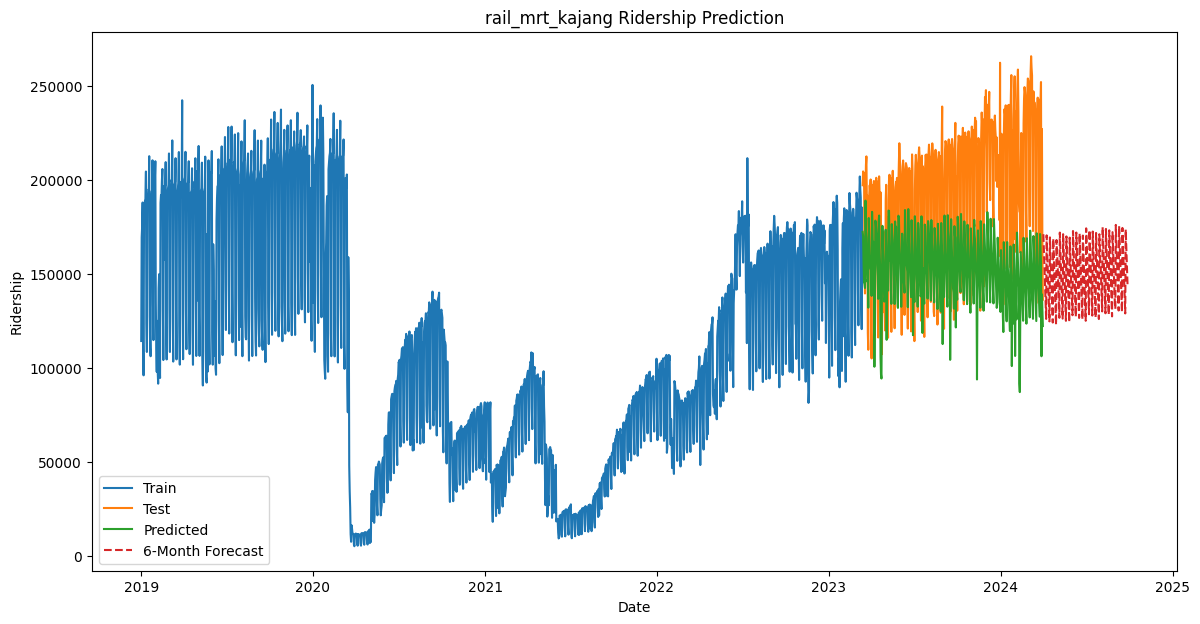

Best SARIMAX Order for rail_lrt_kj: ((0, 0, 0), (1, 0, 1, 12))
Test RMSE for rail_lrt_kj: 38780.5863457235


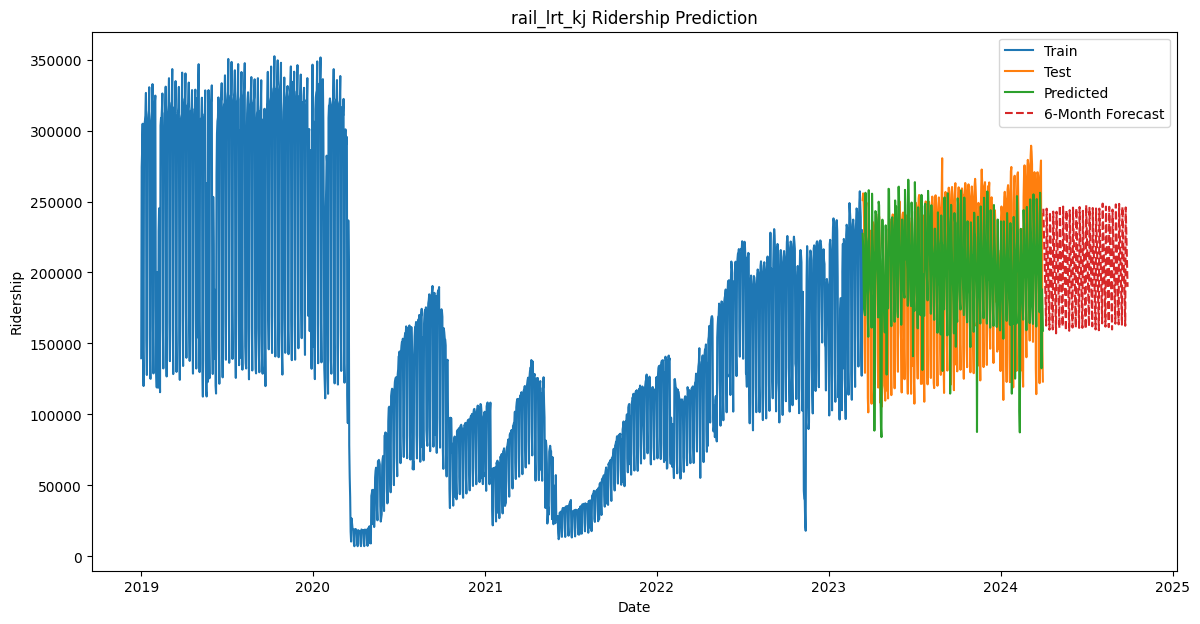

Best SARIMAX Order for rail_monorail: ((0, 0, 1), (1, 0, 0, 12))
Test RMSE for rail_monorail: 19948.561239855975


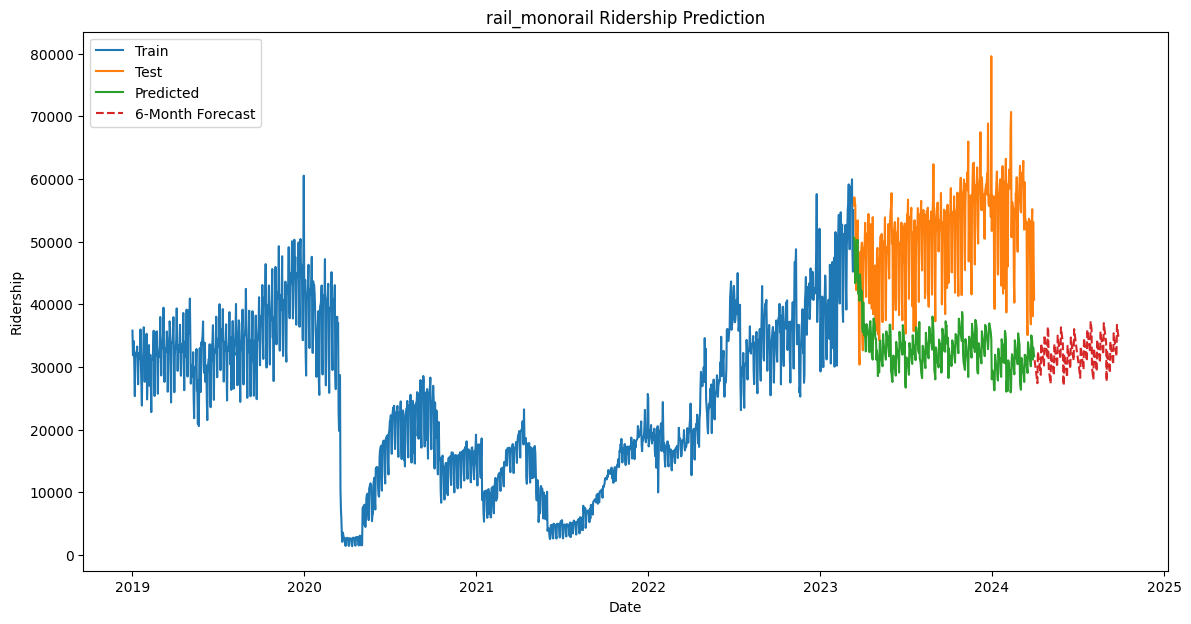

In [754]:
# Define lagged features
lags = [1, 2, 3, 7, 14]

targets = ['rail_mrt_pjy', 'rail_lrt_ampang', 'rail_mrt_kajang', 'rail_lrt_kj', 'rail_monorail']
# Define a list of relevant features
features = ['public_Holiday', 'covid', 'feelslike', 'uvindex', 'rain', 'year', 'month', 'day', 'day_of_week']

for target in targets:
    
    if target == 'rail_mrt_pjy':
        current_df = filtered_rail_mrt_pjy_df
    elif target == 'rail_lrt_ampang':
        current_df = rail_lrt_ampang_df
    elif target == 'rail_mrt_kajang':
        current_df = rail_mrt_kajang_df
    elif target == 'rail_lrt_kj':
        current_df = rail_lrt_kj_df
    elif target == 'rail_monorail':
        current_df = rail_monorail_df
    else:
        print(f"Target variable {target} not found in DataFrames.")
        continue
    
    # Apply feature engineering
    current_df, lagged_features = add_lagged_features(current_df, target, lags)  # Applying lagged features
    current_df = current_df[['date', target] + lagged_features + features]

    train_ridership, test_ridership = train_test_split(current_df)

    # Perform cross-validation and hyperparameter tuning
    best_params = sarimax_cv_parallel(train_ridership, features, order_values, seasonal_order_values)
    print(f"Best SARIMAX Order for {target}:", best_params)

    # Build the final SARIMAX model with the best parameters
    model_ridership = SARIMAX(endog=train_ridership[target], exog=train_ridership[features], order=best_params[0], seasonal_order=best_params[1], enforce_stationarity=False, enforce_invertibility=False)
    model_ridership_fit = model_ridership.fit()

    
    # Generate future dates and features
    last_date = pd.to_datetime(test_ridership['date'].iloc[-1])  # Get the last date in the testing set
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=180, freq='D')  # Start forecasting after the last date in the testing set  # Ensure proper addition of timedelta
    last_known_features = test_ridership[features].iloc[-1].to_dict()
    future_features = create_future_features(last_known_features, future_dates)

    # Ensure no NaNs or infinite values in future_features
    future_features = future_features.fillna(method='ffill').fillna(method='bfill')

    # Combine the train, test, and future features
    combined_exog = pd.concat([train_ridership[features], test_ridership[features], future_features], axis=0)

    # Make predictions for the test set
    test_predictions_ridership = model_ridership_fit.predict(start=len(train_ridership), end=len(train_ridership)+len(test_ridership)-1, exog=combined_exog.iloc[len(train_ridership):len(train_ridership)+len(test_ridership)])

    # Calculate RMSE for the test set
    test_rmse_ridership = np.sqrt(mean_squared_error(test_ridership[target], test_predictions_ridership))
    print(f"Test RMSE for {target}:", test_rmse_ridership)

    # Forecast future values
    future_predictions_ridership = model_ridership_fit.predict(start=len(train_ridership)+len(test_ridership), end=len(train_ridership)+len(test_ridership)+180-1, exog=combined_exog.iloc[len(train_ridership):])

    # Plot the predictions
    plt.figure(figsize=(14, 7))
    plt.plot(train_ridership['date'], train_ridership[target], label='Train')
    plt.plot(test_ridership['date'], test_ridership[target], label='Test')
    plt.plot(test_ridership['date'], test_predictions_ridership, label='Predicted')
    plt.plot(future_dates, future_predictions_ridership, label='6-Month Forecast', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Ridership')
    plt.title(f'{target} Ridership Prediction')
    plt.legend()
    plt.show()
